In [1]:
import matplotlib.pyplot as plt
import numpy as np

quality = 200

linreg
incertitudes

tout en mm
$$
f_c = \frac{d}{2\lambda f}
$$
$$
\frac{\partial}{\partial d} = \frac{1}{2\lambda f}
$$

In [10]:
lamb = 632e-6 # mm
f = 500 # mm

d = np.linspace(1,25,100)
fc = d / (2*lamb*f) 

inc_diam = 1 # mm
inc_propag = 1 / (2*lamb*f)
inc_propag

1.5822784810126582

In [3]:
ouverture_iris = [1, 2, 3, 4, 5, 7, 9, 16, 25] # mm
freq_coupure = [1.25, 3.33, 5.88, 6.67, 6.67, 6.67, 10, 16.67, 26] # mm-1

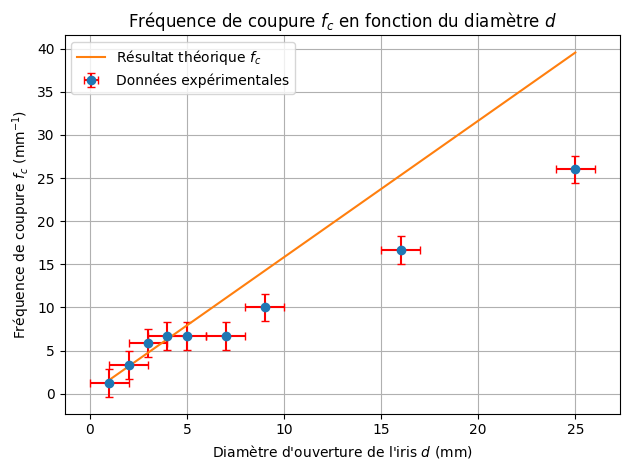

In [4]:
plt.plot(figsize=[8,6])
plt.errorbar(ouverture_iris, freq_coupure, yerr=inc_propag, xerr=inc_diam, fmt='o', ecolor='red', capsize=3, label="Données expérimentales")
#plt.scatter(ouverture_iris, freq_coupure)
plt.plot(d, fc, label=r"Résultat théorique $f_c$")
plt.legend()
plt.title(r"Fréquence de coupure $f_c$ en fonction du diamètre $d$")
plt.xlabel(r"Diamètre d'ouverture de l'iris $d$ (mm)")
plt.ylabel(r"Fréquence de coupure $f_c$ (mm$^{-1}$)")
plt.grid()
plt.tight_layout()
plt.savefig("graph_fc", dpi = quality)

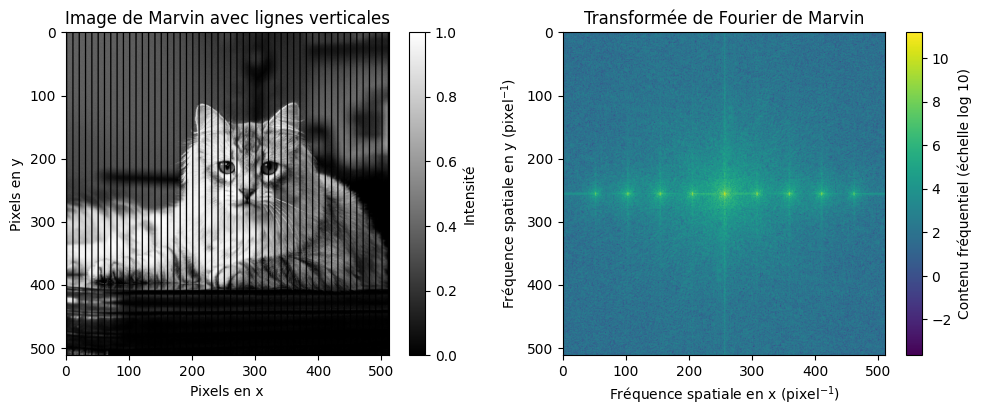

In [5]:
marvin = plt.imread('marvin_striped.png')
Marvin = np.fft.fft2(marvin) # compute fft2
Marvin = np.fft.fftshift(Marvin) # shift fft2

plt.figure(figsize=[10, 4])

plt.subplot(1,2,1)
im1 = plt.imshow(marvin, cmap='gray')
plt.title("Image de Marvin avec lignes verticales")
plt.xlabel("Pixels en x")
plt.ylabel("Pixels en y")
cb1 = plt.colorbar(im1)
cb1.set_label('Intensité')

plt.subplot(1,2,2)
im2 = plt.imshow(np.log(np.abs(Marvin)))
plt.title("Transformée de Fourier de Marvin")
plt.xlabel(r"Fréquence spatiale en x (pixel$^{-1}$)")
plt.ylabel(r"Fréquence spatiale en y (pixel$^{-1}$)")
cb2 = plt.colorbar(im2)
cb2.set_label('Contenu fréquentiel (échelle log 10)')

plt.tight_layout()
plt.savefig("marvin_bars", dpi = quality)

In [7]:
freq_c = [3.33, 5.00, 6.67, 12.50, 16.67, 26.00]
diam_iris_theorique = 2*np.array(freq_c)*lamb*f

In [8]:
image_list = []
for k in freq_c :
    w = np.ones(marvin.shape)
    for i in range(w.shape[0]):
        for j in range(w.shape[1]):
            r2 = (i-511/2)**2 + (j-511/2)**2
            if r2 > k**2:
                w[i,j] = 0
    
    Marvin_filtered = Marvin*w
    
    Marvin_filtered_unshifted = np.fft.fftshift(Marvin_filtered)  # Unshift
    marvin_filtered = np.fft.ifft2(Marvin_filtered_unshifted).real
    image_list.append(marvin_filtered)

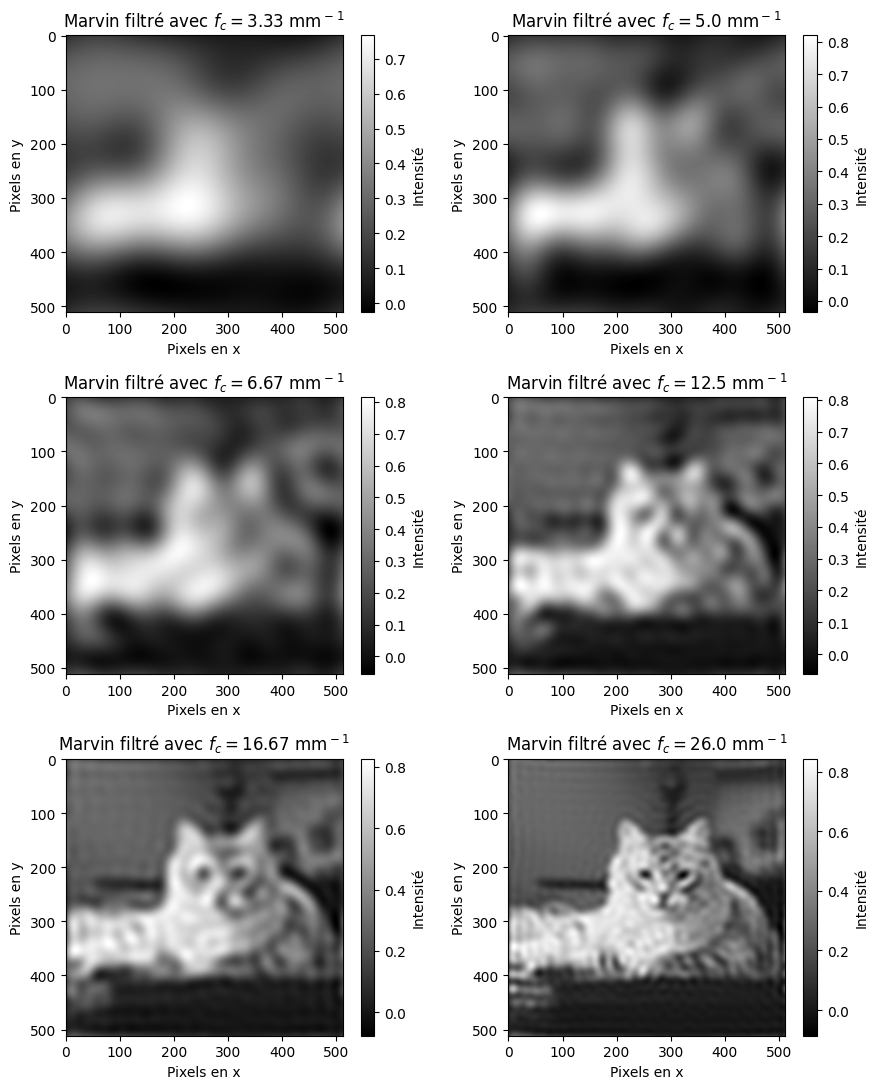

In [9]:
plt.figure(figsize=[9,11])

for i in range(6):
    plt.subplot(3,2,i+1)
    im = plt.imshow(image_list[i], cmap='gray')
    plt.title(rf"Marvin filtré avec $f_c = ${freq_c[i]} mm$^-$$^1$")
    plt.xlabel("Pixels en x")
    plt.ylabel("Pixels en y")
    cb = plt.colorbar(im)
    cb.set_label('Intensité')

plt.tight_layout()
plt.savefig(f"marvin_post_filter_bars", dpi = quality)